# SVM with PCA (BGR)

In [17]:
import cv2
import os
import glob
import time
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    precision_recall_fscore_support
)

In [2]:
TRAIN_DIR = "../data/train"
TEST_DIR = "../data/test"
CLASS_FOLDERS = ["Class A", "Class B", "Class C", "Class D"]

In [3]:
pca_components = 50 * 50
C_values = 9
kernel_types = "rbf"
gamma_values = "scale"

In [4]:
def train_with_params(pca_components, C, kernel, gamma, train_images, train_labels):
    start_time = time.time()

    pca = PCA(n_components=pca_components)
    pca.fit(train_images)
    train_images_pca = pca.transform(train_images)

    clf = svm.SVC(
        C=C, kernel=kernel, gamma=gamma, class_weight="balanced", verbose=True
    )
    clf.fit(train_images_pca, train_labels)

    end_time = time.time()
    duration = end_time - start_time
    param_details = f"PCA={pca_components}, C={C}, kernel={kernel}, gamma={gamma}"
    duration_details = f"Training duration for {param_details}: {duration} seconds"
    print(duration_details)
    return clf, pca

In [5]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for class_folder in CLASS_FOLDERS:
        start_time = time.time()
        class_path = os.path.join(folder, class_folder)
        image_files = glob.glob(os.path.join(class_path, "*.png"))
        for img_file in image_files:
            processed_image = cv2.imread(img_file)
            flattened_image = processed_image.flatten()
            images.append(flattened_image)
            labels.append(class_folder)
        end_time = time.time()
        duration = end_time - start_time
        print(f"Processing {class_folder} took {duration} seconds")
    return np.array(images), np.array(labels)

In [6]:
train_images, train_labels = load_images_from_folder(TRAIN_DIR)

Processing Class A took 1.6151227951049805 seconds
Processing Class B took 0.9051609039306641 seconds
Processing Class C took 0.6083321571350098 seconds
Processing Class D took 0.7448341846466064 seconds


In [7]:
print(
    f"Shape of train_images: {train_images.shape}, Shape of train_labels: {train_labels.shape}"
)

Shape of train_images: (2796, 150528), Shape of train_labels: (2796,)


In [8]:
clf, pca = train_with_params(
    pca_components, C_values, kernel_types, gamma_values, train_images, train_labels
)

[LibSVM].*.*
optimization finished, #iter = 2748
obj = -1091.484978, rho = -0.033363
nSV = 925, nBSV = 76
*.*
optimization finished, #iter = 1272
obj = -197.476089, rho = -0.090567
nSV = 521, nBSV = 2
.*
optimization finished, #iter = 1661
obj = -294.602562, rho = -0.095587
nSV = 636, nBSV = 12
.*.*
optimization finished, #iter = 2162
obj = -707.636001, rho = 0.240598
nSV = 817, nBSV = 5
.*.*
optimization finished, #iter = 2319
obj = -560.982340, rho = 0.258971
nSV = 843, nBSV = 1
.*
optimization finished, #iter = 1931
obj = -549.899295, rho = 0.212105
nSV = 775, nBSV = 4
Total nSV = 2130
Training duration for PCA=2500, C=9, kernel=rbf, gamma=scale: 213.16640782356262 seconds


In [9]:
train_images_pca = pca.transform(train_images)

In [10]:
train_predictions = clf.predict(train_images_pca)

In [11]:
accuracy = accuracy_score(train_labels, train_predictions)
precision_weighted = precision_score(train_labels, train_predictions, average="weighted")
recall_weighted = recall_score(train_labels, train_predictions, average="weighted")
f1_weighted = f1_score(train_labels, train_predictions, average="weighted")

precision_macro = precision_score(train_labels, train_predictions, average="macro")
recall_macro = recall_score(train_labels, train_predictions, average="macro")
f1_macro = f1_score(train_labels, train_predictions, average="macro")

confusion = confusion_matrix(train_labels, train_predictions)

print(f"Accuracy: {accuracy}")
print(f"Weighted Precision: {precision_weighted}")
print(f"Weighted Recall: {recall_weighted}")
print(f"Weighted F1 Score: {f1_weighted}")

print(f"Macro Precision: {precision_macro}")
print(f"Macro Recall: {recall_macro}")
print(f"Macro F1 Score: {f1_macro}")

print(f"Confusion Matrix:\n{confusion}")

Accuracy: 0.9985693848354793
Weighted Precision: 0.9985695540523866
Weighted Recall: 0.9985693848354793
Weighted F1 Score: 0.9985686818816429
Macro Precision: 0.9987278712278712
Macro Recall: 0.9986309705918662
Macro F1 Score: 0.998678581997608
Confusion Matrix:
[[1142    1    0    0]
 [   2  649    0    1]
 [   0    0  447    0]
 [   0    0    0  554]]


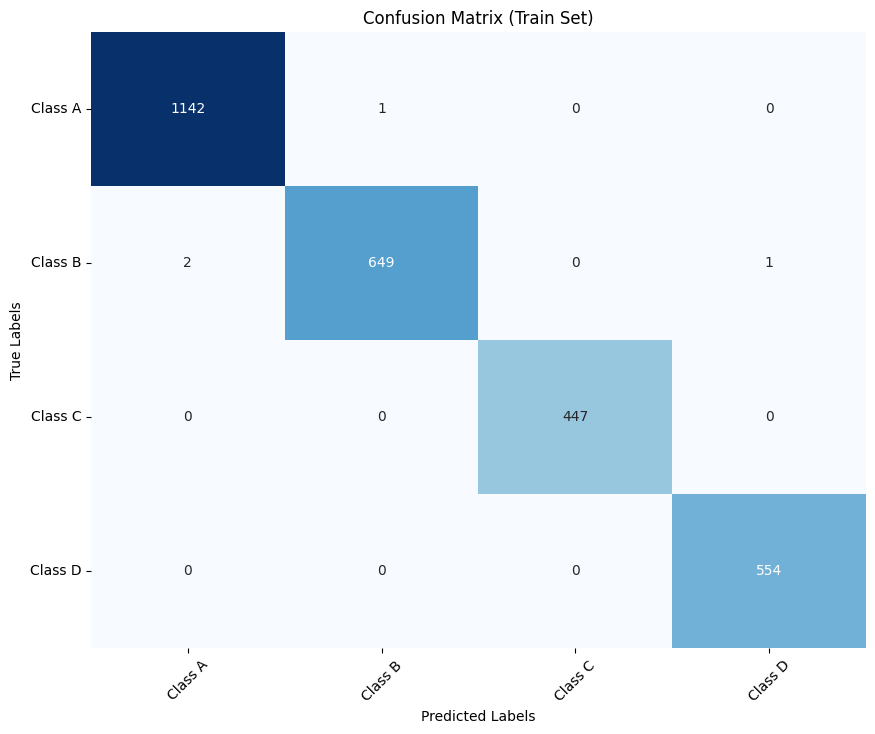

In [12]:
plt.figure(figsize=(10, 8), dpi=100)
heatmap = sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)

heatmap.set_xticklabels(CLASS_FOLDERS, rotation=45)
heatmap.set_yticklabels(CLASS_FOLDERS, rotation=0)

plt.title("Confusion Matrix (Train Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [13]:
test_images, test_labels = load_images_from_folder(TEST_DIR)

Processing Class A took 0.41683101654052734 seconds
Processing Class B took 0.23235797882080078 seconds
Processing Class C took 0.15895986557006836 seconds
Processing Class D took 0.19282221794128418 seconds


In [14]:
print(
    f"Shape of test_images: {test_images.shape}, Shape of test_labels: {test_labels.shape}"
)

Shape of test_images: (699, 150528), Shape of test_labels: (699,)


In [15]:
test_images_pca = pca.transform(test_images)

In [16]:
test_predictions = clf.predict(test_images_pca)

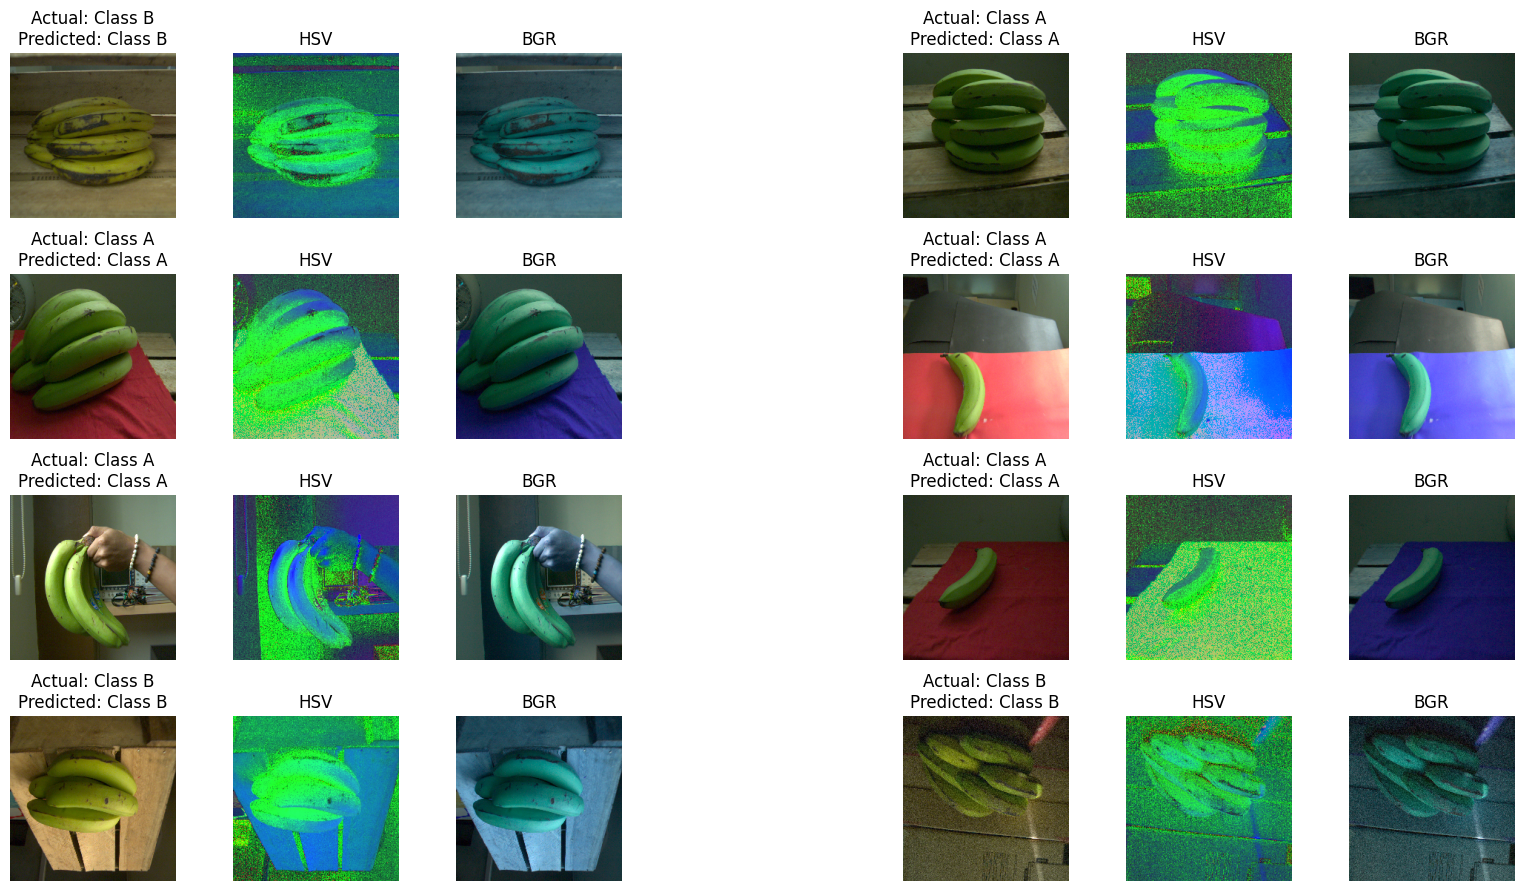

In [41]:
classified_indices = [
    i for i in range(len(test_labels)) if test_labels[i] == test_predictions[i]
]

random_classified_indices = random.sample(
    classified_indices, min(8, len(classified_indices))
)

plt.figure(figsize=(18, 9))
for i, idx in enumerate(random_classified_indices):
    image = test_images[idx]
    actual_class = test_labels[idx]
    predicted_class = test_predictions[idx]

    # Reshape and convert to HSV
    resized_image = image.reshape(224, 224, 3)
    hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)

    # Convert to RGB for display
    rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

    # Display RGB image with actual and predicted classes
    plt.subplot(4, 8, i * 4 + 1)
    plt.imshow(rgb_image)
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
    plt.axis("off")

    # Display HSV image
    plt.subplot(4, 8, i * 4 + 2)
    plt.imshow(hsv_image, cmap="hsv")
    plt.title("HSV")
    plt.axis("off")

    # Display BGR image
    plt.subplot(4, 8, i * 4 + 3)
    plt.imshow(resized_image)
    plt.title("BGR")
    plt.axis("off")

plt.tight_layout()
plt.show()

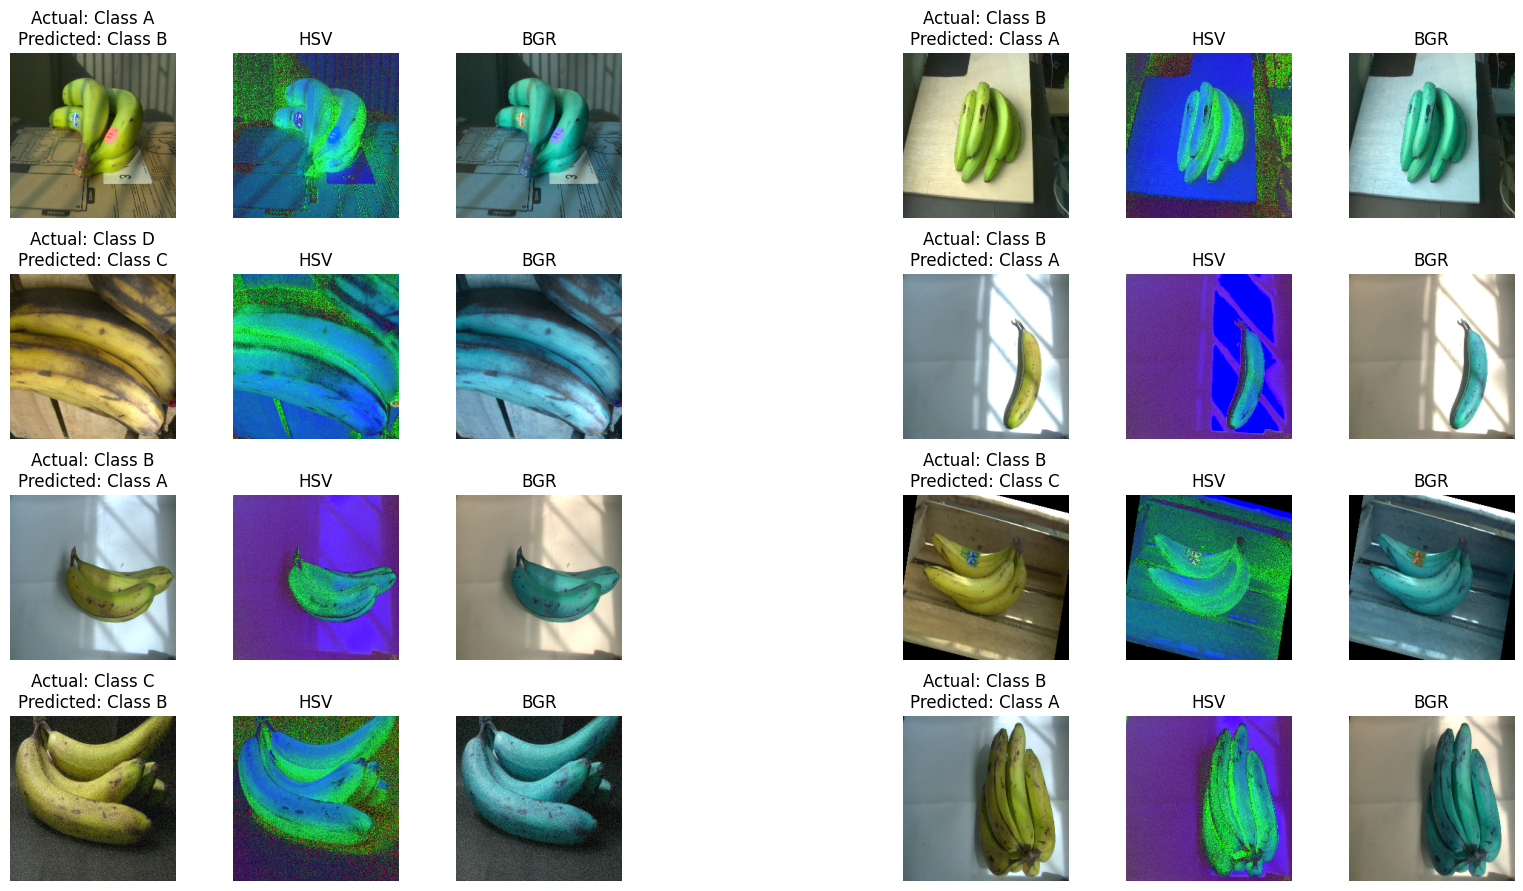

In [44]:
misclassified_indices = [
    i for i in range(len(test_labels)) if test_labels[i] != test_predictions[i]
]

random_misclassified_indices = random.sample(
    misclassified_indices, min(8, len(misclassified_indices))
)

plt.figure(figsize=(18, 9))
for i, idx in enumerate(random_misclassified_indices):
    image = test_images[idx]
    actual_class = test_labels[idx]
    predicted_class = test_predictions[idx]

    # Reshape and convert to HSV
    resized_image = image.reshape(224, 224, 3)
    hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)

    # Convert to RGB for display
    rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

    # Display RGB image with actual and predicted classes
    plt.subplot(4, 8, i * 4 + 1)
    plt.imshow(rgb_image)
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
    plt.axis("off")

    # Display HSV image
    plt.subplot(4, 8, i * 4 + 2)
    plt.imshow(hsv_image, cmap="hsv")
    plt.title("HSV")
    plt.axis("off")

    # Display BGR image
    plt.subplot(4, 8, i * 4 + 3)
    plt.imshow(resized_image)
    plt.title("BGR")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [26]:
accuracy = accuracy_score(test_labels, test_predictions)
precision_weighted = precision_score(test_labels, test_predictions, average="weighted")
recall_weighted = recall_score(test_labels, test_predictions, average="weighted")
f1_weighted = f1_score(test_labels, test_predictions, average="weighted")

precision_macro = precision_score(test_labels, test_predictions, average="macro")
recall_macro = recall_score(test_labels, test_predictions, average="macro")
f1_macro = f1_score(test_labels, test_predictions, average="macro")

confusion = confusion_matrix(test_labels, test_predictions)

print(f"Accuracy: {accuracy}")
print(f"Weighted Precision: {precision_weighted}")
print(f"Weighted Recall: {recall_weighted}")
print(f"Weighted F1 Score: {f1_weighted}")

print(f"Macro Precision: {precision_macro}")
print(f"Macro Recall: {recall_macro}")
print(f"Macro F1 Score: {f1_macro}")

print(f"Confusion Matrix:\n{confusion}")

Accuracy: 0.8655221745350501
Weighted Precision: 0.8657435643646043
Weighted Recall: 0.8655221745350501
Weighted F1 Score: 0.8645363023469408
Macro Precision: 0.8481461163999331
Macro Recall: 0.846973388430277
Macro F1 Score: 0.8462243622920519
Confusion Matrix:
[[273  13   0   0]
 [ 22 119  17   5]
 [  0   9  95   8]
 [  1   6  13 118]]


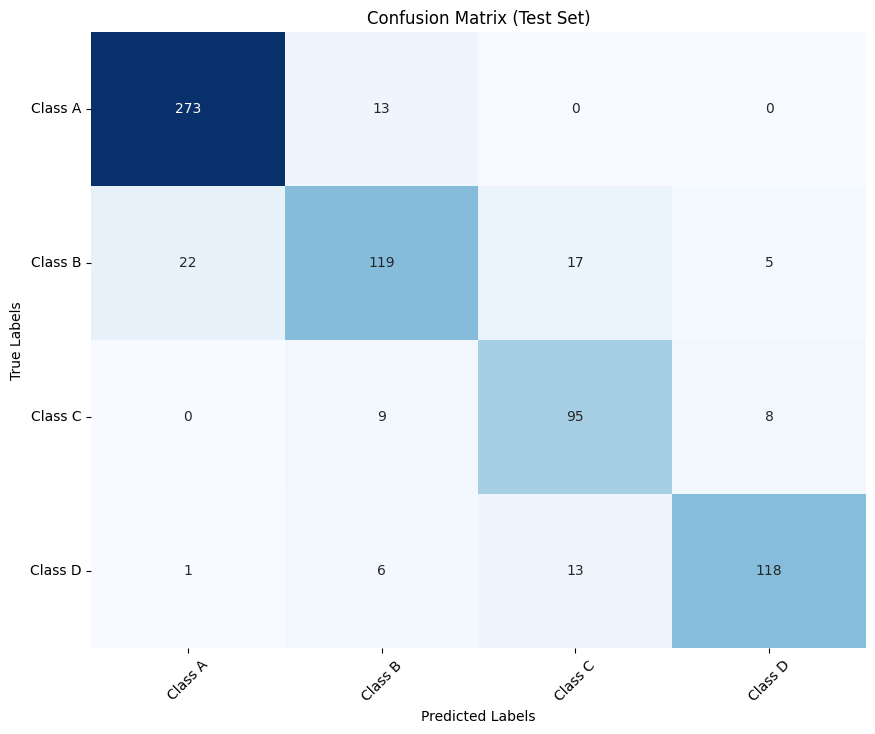

In [30]:
plt.figure(figsize=(10, 8), dpi=100)
heatmap = sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)

heatmap.set_xticklabels(CLASS_FOLDERS, rotation=45)
heatmap.set_yticklabels(CLASS_FOLDERS, rotation=0)

plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [42]:
(
    precision_per_class,
    recall_per_class,
    fscore_per_class,
    support_per_class,
) = precision_recall_fscore_support(test_labels, test_predictions, average=None)

for i, (precision, recall, fscore, support) in enumerate(
    zip(precision_per_class, recall_per_class, fscore_per_class, support_per_class)
):
    print(
        f"{CLASS_FOLDERS[i]}: Precision={precision}, Recall={recall}, F-score={fscore}, Support={support}"
    )

Class A: Precision=0.9222972972972973, Recall=0.9545454545454546, F-score=0.9381443298969071, Support=286
Class B: Precision=0.8095238095238095, Recall=0.7300613496932515, F-score=0.7677419354838709, Support=163
Class C: Precision=0.76, Recall=0.8482142857142857, F-score=0.8016877637130801, Support=112
Class D: Precision=0.9007633587786259, Recall=0.855072463768116, F-score=0.8773234200743495, Support=138
